## Predicting Nutritional Status using Python Machine Learning
**Introduction to Python Final Project**
by Nurulita Aida Rahmasari

**Background and Objective**

Nutrition problem, including under and overnutrition, is now become one of the non-communicable disease in the world. The condition can lead into more serious complications such as diabetes, hypertension, stroke, CVD, etc. Thus, it is important for people to know and track their nutritional status in order to prevent them falling into worst state. This project aims to create accurate nutritional status prediction from available data to help people understand whether they are in risk for further serious problem or not

**Data Profile**

* Datasets contain individuals obesity level, eating habits, and physical condition originated from Mexico, Peru, and Colombia
* Source: https://www.kaggle.com/ankurbajaj9/obesity-levels
* Amount of available data: 2111
* Amount of variables: 17

<table>
    <thead>
        <tr><th>Category</th><th>Feature Name</th><th>Description</th><th>Variable Type</th></tr>
    </thead>
    <tbody>
        <tr><td>Target Variable</td><td>NObesity</td><td>Based on BMI</td><td>Categorical</td></tr>
        <tr><td>Eating Habits</td><td>FAVC</td><td>Frequent consumption of high caloric food</td><td>Categorical</td></tr>
        <tr><td>Eating Habits</td><td>FCVC</td><td>Frequency of consumption of vegetables</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>NCP</td><td>Number of main meals</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>CAEC</td><td>Consumption of food between meals</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>CH20</td><td>Consumption of water daily</td><td>Ordinal</td></tr>
        <tr><td>Eating Habits</td><td>CALC</td><td>Consumption of alcohol</td><td>Ordinal</td></tr>
        <tr><td>Physical Conditioning</td><td>SCC</td><td>Calories consumption monitoring</td><td>Categorical</td></tr>
        <tr><td>Physical Conditioning</td><td>FAF</td><td>Pysical activity frequency</td><td>Ordinal</td></tr>
        <tr><td>Physical Conditioning</td><td>TUE</td><td>Time using technology devices</td><td>Ordinal</td></tr>
        <tr><td>Physical Conditioning</td><td>MTRANS</td><td>Transportation used</td><td>Categorical</td></tr>
        <tr><td>Physical Conditioning</td><td>SMOKE</td><td>Smokes Yes or No</td><td>Categorical</td></tr>
        <tr><td>Responder Charateristics</td><td>Family History with Overweight</td><td>Yes or No</td><td>Categorical</td></tr>
        <tr><td>Responder Charateristics</td><td>Gender</td><td>Gender is Male or Female</td><td>Categorical</td></tr>
        <tr><td>Responder Charateristics</td><td>Age</td><td>Age in years</td><td>Integer</td></tr>
        <tr><td>Responder Charateristics</td><td>Height</td><td>Height in meters</td><td>Float</td></tr>
        <tr><td>Responder Charateristics</td><td>Weight</td><td>Weight in kilograms</td><td>Float</td></tr>        
     </tbody>
</table>

**What's Inside the Notebook**

1. Data Exploration and Preparation
    * Importing data
    * Variables: dropping the unnecessaries, renaming, and adjusting type. In this project, features used are gender, age, height, weight, and physical activity. Those variables are expected to predict the nutritional status of individuals
    * Null values. Hint: No null values found
    * Descriptive statistics
2. Data Visualization
    * Checking for target variable distribution
    * Recategorizing target variable. The nutritional status is re-classified from 7 categories into 3 categories in order to simplify usage
3. Bivariate Analysis: Exploring relationship between variables
    * Gaining insights from the relationship between target and feature variables through visualization
4. Models: Define, Train, and Evaluate
    * Using models for classification that accomodate >2 categories for the target variables: Decision Tree and Random Forest Classifier
    * Data treatment including copy cleaned data to new dataframe, create dummy variables out of categorical variables, and split the data into 70/30 train & test datasets

**Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Import, Clean Up, and Preparation**

In [2]:
df=pd.read_csv('dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# checking data shape

df.shape

(2111, 17)

In [6]:
# remove unecessary data
df = df.drop(columns=['family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','TUE','CALC','MTRANS'])

In [7]:
# re-checking data shape

df.shape

(2111, 6)

In [8]:
# checking missing data and/or null value

df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FAF           0
NObeyesdad    0
dtype: int64

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum().sum()

0

**Conclusion:** No missing value

In [11]:
# checking new data

df.head(10)

,Gender,Age,Height,Weight,FAF,NObeyesdad
0,Female,21.0,1.62,64.0,0.0,Normal_Weight
1,Female,21.0,1.52,56.0,3.0,Normal_Weight
2,Male,23.0,1.80,77.0,2.0,Normal_Weight
3,Male,27.0,1.80,87.0,2.0,Overweight_Level_I
4,Male,22.0,1.78,89.8,0.0,Overweight_Level_II
5,Male,29.0,1.62,53.0,0.0,Normal_Weight
6,Female,23.0,1.50,55.0,1.0,Normal_Weight
7,Male,22.0,1.64,53.0,3.0,Normal_Weight
8,Male,24.0,1.78,64.0,1.0,Normal_Weight
9,Male,22.0,1.72,68.0,1.0,Normal_Weight


In [12]:
# renaming FAF into PA (Physical Activity) 
# renaming NObeyesdad into NutStatus 

df.rename(columns={u'FAF':u'PA', u'NObeyesdad':u'NutStatus'}, inplace=True)

In [13]:
df.tail(10)

,Gender,Age,Height,Weight,PA,NutStatus
2101,Female,25.722004,1.628470,107.218949,0.067329,Obesity_Type_III
2102,Female,25.765628,1.627839,108.107360,0.045246,Obesity_Type_III
2103,Female,21.016849,1.724268,133.033523,1.537639,Obesity_Type_III
2104,Female,21.682367,1.732383,133.043941,1.510398,Obesity_Type_III
2105,Female,21.285965,1.726920,131.335786,1.728332,Obesity_Type_III
2106,Female,20.976842,1.710730,131.408528,1.676269,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,1.341390,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,1.414209,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,1.139107,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,1.026452,Obesity_Type_III


In [14]:
# describe variable type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gender     2111 non-null   object 
 1   Age        2111 non-null   float64
 2   Height     2111 non-null   float64
 3   Weight     2111 non-null   float64
 4   PA         2111 non-null   float64
 5   NutStatus  2111 non-null   object 
dtypes: float64(4), object(2)
memory usage: 99.1+ KB


In [15]:
# converting object data type into category

columns = ['Gender', 'NutStatus']
for col in columns:
    df[col] = df[col].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Gender     2111 non-null   category
 1   Age        2111 non-null   float64 
 2   Height     2111 non-null   float64 
 3   Weight     2111 non-null   float64 
 4   PA         2111 non-null   float64 
 5   NutStatus  2111 non-null   category
dtypes: category(2), float64(4)
memory usage: 70.7 KB


In [17]:
# descriptive statistics

df.describe()

,Age,Height,Weight,PA
count,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,1.010298
std,6.345968,0.093305,26.191172,0.850592
min,14.000000,1.450000,39.000000,0.000000
25%,19.947192,1.630000,65.473343,0.124505
50%,22.777890,1.700499,83.000000,1.000000
75%,26.000000,1.768464,107.430682,1.666678
max,61.000000,1.980000,173.000000,3.000000


**Further Data Exploration**:

* Insights from Data Visualization
* Data encoding

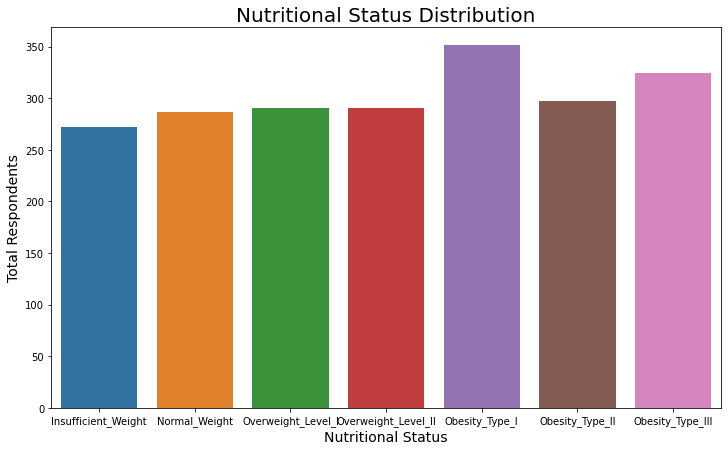

In [18]:
# target variable distribution

plt.figure(figsize=(12,7))
sns.countplot(x='NutStatus', 
              data=df, 
              order=['Insufficient_Weight',
                    'Normal_Weight',
                    'Overweight_Level_I',
                    'Overweight_Level_II',
                    'Obesity_Type_I',
                    'Obesity_Type_II',
                    'Obesity_Type_III'])
plt.xlabel('Nutritional Status', fontsize=14)
plt.ylabel('Total Respondents', fontsize=14)
plt.title('Nutritional Status Distribution', fontsize=20)
plt.show()

**Insights:** The nutritional status is divided into 7 categories which are insufficient weight, normal weight, overweight level 1 and 2, also obesity type 1, 2, and 3. All the nutritional status is fairly distributed

In [19]:
# re-categorize target variable into three categories

reNS = {'Insufficient_Weight':0,
       'Normal_Weight':1, 
       'Overweight_Level_I':2,
       'Overweight_Level_II':2,
       'Obesity_Type_I':2,
       'Obesity_Type_II':2,
       'Obesity_Type_III':2}

df['reNutStat'] = df['NutStatus'].map(reNS)

In [20]:
df.head()

,Gender,Age,Height,Weight,PA,NutStatus,reNutStat
0,Female,21.0,1.62,64.0,0.0,Normal_Weight,1
1,Female,21.0,1.52,56.0,3.0,Normal_Weight,1
2,Male,23.0,1.80,77.0,2.0,Normal_Weight,1
3,Male,27.0,1.80,87.0,2.0,Overweight_Level_I,2
4,Male,22.0,1.78,89.8,0.0,Overweight_Level_II,2


In [21]:
df.tail()

,Gender,Age,Height,Weight,PA,NutStatus,reNutStat
2106,Female,20.976842,1.710730,131.408528,1.676269,Obesity_Type_III,2
2107,Female,21.982942,1.748584,133.742943,1.341390,Obesity_Type_III,2
2108,Female,22.524036,1.752206,133.689352,1.414209,Obesity_Type_III,2
2109,Female,24.361936,1.739450,133.346641,1.139107,Obesity_Type_III,2
2110,Female,23.664709,1.738836,133.472641,1.026452,Obesity_Type_III,2


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Gender     2111 non-null   category
 1   Age        2111 non-null   float64 
 2   Height     2111 non-null   float64 
 3   Weight     2111 non-null   float64 
 4   PA         2111 non-null   float64 
 5   NutStatus  2111 non-null   category
 6   reNutStat  2111 non-null   int64   
dtypes: category(2), float64(4), int64(1)
memory usage: 87.2 KB


In [23]:
columns = ['reNutStat']
for col in columns:
    df[col] = df[col].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Gender     2111 non-null   category
 1   Age        2111 non-null   float64 
 2   Height     2111 non-null   float64 
 3   Weight     2111 non-null   float64 
 4   PA         2111 non-null   float64 
 5   NutStatus  2111 non-null   category
 6   reNutStat  2111 non-null   category
dtypes: category(3), float64(4)
memory usage: 72.8 KB


In [25]:
NS = {0: 'Undernutrition',
      1: 'Normal', 
      2: 'Overnutrition'}

df['reNS'] = df['reNutStat'].map(NS)

In [26]:
df.head()

,Gender,Age,Height,Weight,PA,NutStatus,reNutStat,reNS
0,Female,21.0,1.62,64.0,0.0,Normal_Weight,1,Normal
1,Female,21.0,1.52,56.0,3.0,Normal_Weight,1,Normal
2,Male,23.0,1.80,77.0,2.0,Normal_Weight,1,Normal
3,Male,27.0,1.80,87.0,2.0,Overweight_Level_I,2,Overnutrition
4,Male,22.0,1.78,89.8,0.0,Overweight_Level_II,2,Overnutrition


In [27]:
# removing old nutrition status variable

df = df.drop(columns=['NutStatus', 'reNutStat'])

In [28]:
df.tail()

,Gender,Age,Height,Weight,PA,reNS
2106,Female,20.976842,1.710730,131.408528,1.676269,Overnutrition
2107,Female,21.982942,1.748584,133.742943,1.341390,Overnutrition
2108,Female,22.524036,1.752206,133.689352,1.414209,Overnutrition
2109,Female,24.361936,1.739450,133.346641,1.139107,Overnutrition
2110,Female,23.664709,1.738836,133.472641,1.026452,Overnutrition


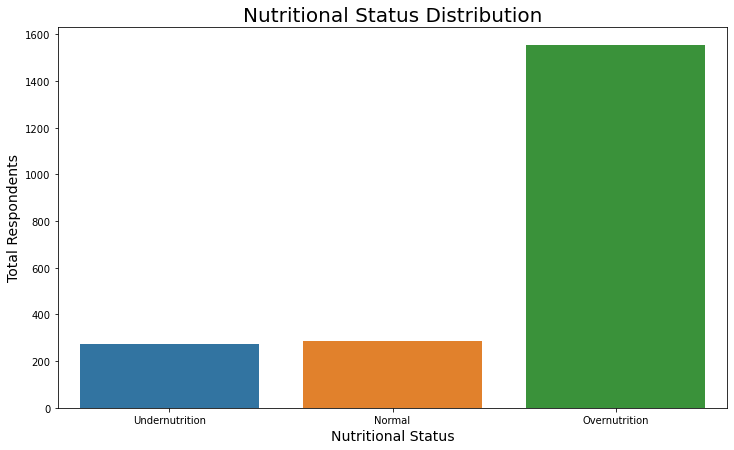

In [29]:
# target variable distribution based on new category

plt.figure(figsize=(12,7))
sns.countplot(x='reNS', 
              data=df, 
              order=['Undernutrition',
                    'Normal',
                    'Overnutrition'])
plt.xlabel('Nutritional Status', fontsize=14)
plt.ylabel('Total Respondents', fontsize=14)
plt.title('Nutritional Status Distribution', fontsize=20)
plt.show()

**Insights:** After being recategorized, most of the respondents are in the overnutrition state, while undernutrition and normal status is fairly disrtibuted. It is make sense considering the initial categorization where overnutrition consisted of five categories (overweight level 1 and 2, obesity type 1, 2, and 3)

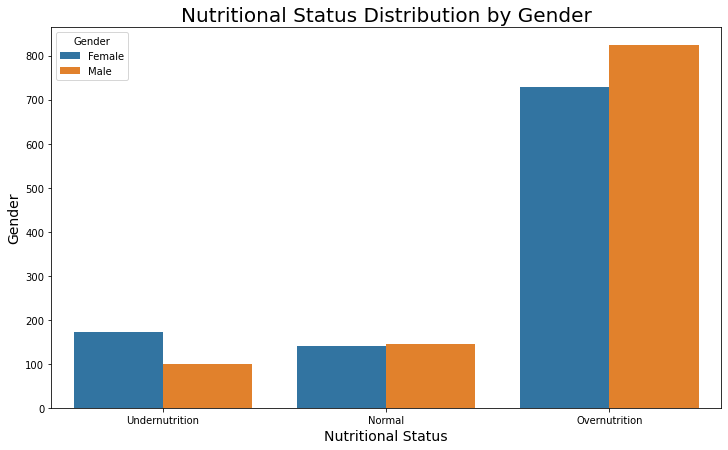

In [30]:
# distribution of target variable based on dependent variables
# nutritional status by gender

plt.figure(figsize=(12,7))
sns.countplot(x='reNS',
              hue='Gender',
              data=df, 
              order=['Undernutrition',
                    'Normal',
                    'Overnutrition'])
plt.xlabel('Nutritional Status', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.title('Nutritional Status Distribution by Gender', fontsize=20)
plt.show()

**Insights:** Female respondents tend to be in undernutrition state, otherwise male respondents is mostly in overnutrition state. Female is known to be more conscious about their weight status

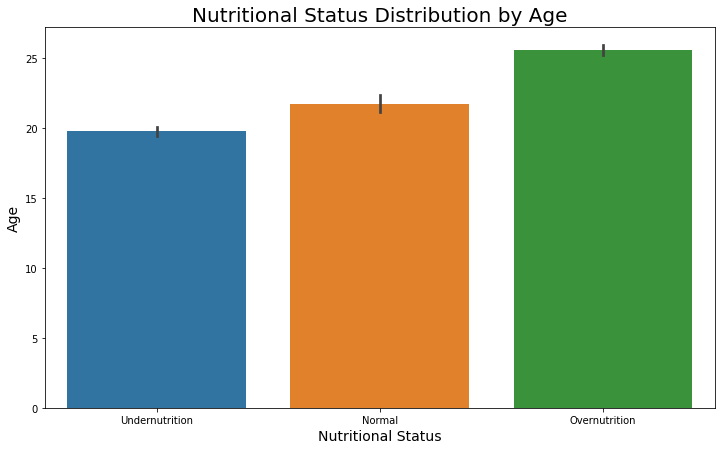

In [31]:
# distribution of target variable based on dependent variables
# nutritional status by age

plt.figure(figsize=(12,7))
sns.barplot(x='reNS',
            y='Age',
            data=df, 
            order=['Undernutrition',
                   'Normal',
                   'Overnutrition'])
plt.xlabel('Nutritional Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Nutritional Status Distribution by Age', fontsize=20)
plt.show()

**Insights:** Overnutrition status is increasing followed by age due to slower metabolism

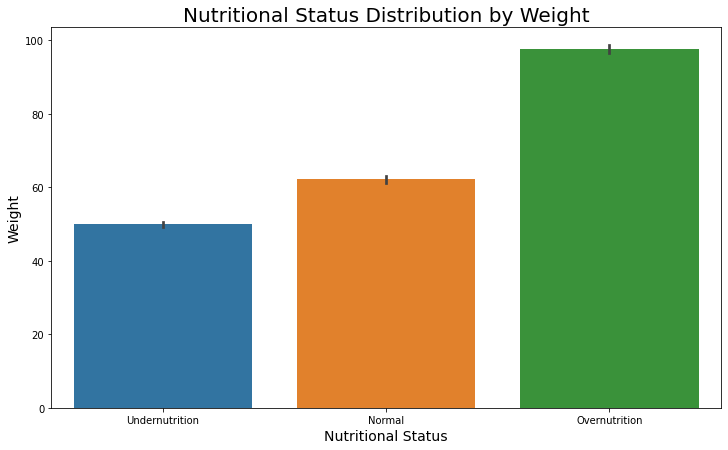

In [32]:
# distribution of target variable based on dependent variables
# nutritional status by weight

plt.figure(figsize=(12,7))
sns.barplot(x='reNS',
            y='Weight',
            data=df, 
            order=['Undernutrition',
                   'Normal',
                   'Overnutrition'])
plt.xlabel('Nutritional Status', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.title('Nutritional Status Distribution by Weight', fontsize=20)
plt.show()

**Insights:** The heavier the individuals, the higher the overnutrition status are, which is make sense because basic nutritional status is defined from weight and height

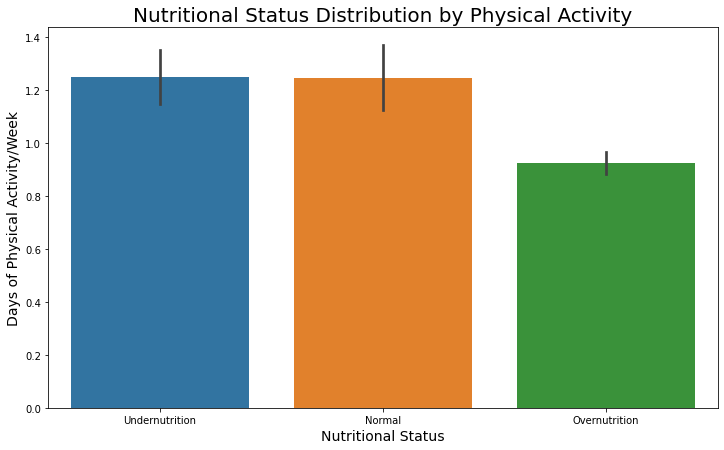

In [33]:
# distribution of target variable based on dependent variables
# nutritional status by physical activity

plt.figure(figsize=(12,7))
sns.barplot(x='reNS',
            y='PA',
            data=df, 
            order=['Undernutrition',
                   'Normal',
                   'Overnutrition'])
plt.xlabel('Nutritional Status', fontsize=14)
plt.ylabel('Days of Physical Activity/Week', fontsize=14)
plt.title('Nutritional Status Distribution by Physical Activity', fontsize=20)
plt.show()

**Insights:** Respondents who have fewer days of physical activity are tend to be overnourished

**Machine Learning**:

* Data Preprocessing
* Models for >2 classes: Training and Evaluation

In [34]:
# creating copy of data
dfNew = df.copy()

In [35]:
# create dummy variable for categorical independent data

gender = ['Gender']

LE = LabelEncoder()
for col in gender:
    dfNew[col] = LE.fit_transform(dfNew[col])

In [36]:
dfNew.head()
# 0 for female, 1 for male

,Gender,Age,Height,Weight,PA,reNS
0,0,21.0,1.62,64.0,0.0,Normal
1,0,21.0,1.52,56.0,3.0,Normal
2,1,23.0,1.80,77.0,2.0,Normal
3,1,27.0,1.80,87.0,2.0,Overnutrition
4,1,22.0,1.78,89.8,0.0,Overnutrition


In [37]:
# create independent and dependent variables dataset

# independent variables
x = dfNew.drop(columns=['reNS'])

# dependent variable
y = dfNew['reNS']

**Model 1**: Decision Tree

In [38]:
# split dataset into training and test set

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=1)

In [39]:
# creating Decision Tree Classifier
dtc = DecisionTreeClassifier()

# train Decision Tree Classifier
dtc = dtc.fit(xTrain, yTrain)

# predict response for test dataset
yPred = dtc.predict(xTest)

In [40]:
# model accuracy
print('Accuracy:', metrics.accuracy_score(yTest, yPred))

Accuracy: 0.9684542586750788


**Model 2**: Random Forest

In [41]:
# split dataset into training and test set

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=1)

In [42]:
# create Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100)

# train model
rfc.fit(xTrain, yTrain)

# predict response
yPred = rfc.predict(xTest)

In [43]:
# model accuracy
print('Accuracy:', metrics.accuracy_score(yTest, yPred))

Accuracy: 0.9794952681388013


**Conclusion**: The best model is Random Forest with higher accuracy compare to Decision Tree

In [44]:
# finding important feature
featureImp = pd.Series(rfc.feature_importances_, index=x.columns).sort_values(ascending=False)

featureImp

Weight    0.623466
Height    0.164433
Age       0.109157
PA        0.083732
Gender    0.019212
dtype: float64

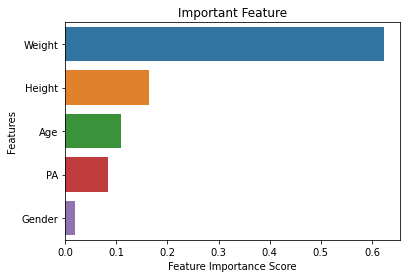

In [45]:
# visualizing important feature
%matplotlib inline

sns.barplot(x = featureImp, y = featureImp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Feature')
plt.show()

In [46]:
# removing gender due to low importance score

p = dfNew[['Weight', 'Height', 'Age', 'PA']]
q = dfNew['reNS']

In [47]:
# split dataset into training and test set

pTrain, pTest, qTrain, qTest = train_test_split(p, q, test_size=0.3, random_state=1)

In [48]:
# create Random Forest Classifier
rfcNew = RandomForestClassifier(n_estimators=100)

# train model
rfcNew.fit(pTrain, qTrain)

# predict response
qPred = rfcNew.predict(pTest)

In [49]:
# model accuracy
print('Accuracy:', metrics.accuracy_score(qTest, qPred))

Accuracy: 0.9747634069400631


**Final Conclusion:** The best model to be used is Random Forest without removing the *gender* variable, since the accuracy is higher in the initial one

**Using Model to Predict Nutritional Status**

*Case 1*
* Gender : Female
* Age : 24
* Height : 1.68
* Weight : 55
* Physical Activity (days/week) : 0

In [50]:
rfc.predict([[0, 24, 1.68, 55, 0]])

array(['Normal'], dtype=object)

*Case 2*
* Gender : Male
* Age : 35
* Height : 1.7
* Weight : 80
* Physical Activity (days/week) : 1

In [51]:
rfc.predict([[1, 35, 1.7, 80, 1]])

array(['Overnutrition'], dtype=object)

*Case 3*
* Gender : Female
* Age : 15
* Height : 1.5
* Weight : 40
* Physical Activity (days/week) : 2

In [52]:
rfc.predict([[0, 15, 1.5, 40, 2]])

array(['Undernutrition'], dtype=object)

**The model can be used to predict nutritional status accurately**